# Programming assignment 1: Visualizing COVID-19 data

## Disclaimer!!

##### - This is not an epidemiology study. It is simply a visualization exercise. Some epidemiology terms may not be correct. related to this [tweet.](https://twitter.com/tobiasgalla/status/1245612214632902656)
##### - ”Not enough testing was done in my country” is a true statement for every country/province/county/city. This is the data we have to work and infer some understanding of what’s happening. Data is always incomplete and inaccurate.
##### - Please use only the raw data I share. This makes marking consistent for the TAs. You can use more recent data to further customize your own dashboard outside this assignment.

# Geographic distribution of worldwide COVID-19 data

Your team wants to develop a dashboard to present daily visualizations of COVID-19 data collected from the [European Centre for Disease Prevention and Control.](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) Every day your team downloads the .xlsx file from the website, reads it, perform some transformations and produces several visualizations that are presented in the dashboard. 

Each row of the table contains the number of new cases and deaths reported per day and country. Every section below describes a specific task or visualization to perform.

# 9. Task #4: Smoothing the noisy data

The graphs clearly show a noisy pattern with significant drops every 7 days for Europe and America. This is probably due to reporting being limited in some countries on certain days.

Here, you are asked to use the 7-day smoothing method we used in section 3 that uses **stats.linregress** to generate the same 2×2 subplots of  the daily cases with the smoothed daily cases in the top 2 graphs.

Also, in a separate 2×2 subplots graph show the 7-day smoothed plots of the daily mortalities and the cumulative mortalities.

In [1]:
# Data from here:
# https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.signal import savgol_filter
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

import glob
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
# READ, RENAME
covid = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-08-27.xlsx")
# REPLACED WITH THE CODE BELOW THAT EXTRACTS THE LATEST .xlsx FILE IN THE FOLDER

# list_of_files = glob.glob('C:\\Users\\nikan\\Desktop\\COVID_daily/*xlsx') # * means all if need specific format then *.csv
# latest_file = max(list_of_files, key=os.path.getctime)
# print(latest_file)
# covid = pd.read_excel(latest_file) 

covid.rename(columns = {'dateRep': 'DateRep', 'day':'Day', 'month':'Month','year':'Year','cases':'Cases','deaths':'Deaths', 'popData2019':'Population', 'countriesAndTerritories': 'Country', 'continentExp':'Continent'}, inplace = True)

In [3]:
covid_daily_per_continent = covid.groupby(['DateRep','Continent'])[['Cases', 'Deaths']].sum()

In [4]:
covid_daily_per_continent = covid.groupby(['DateRep','Continent'])[['Cases', 'Deaths']].sum()

In [5]:
covid_daily_per_continent_cumulative = covid_daily_per_continent.groupby(['Continent']).cumsum()
covid_daily_per_continent.reset_index(inplace=True)
covid_daily_per_continent_cumulative.reset_index(inplace=True)
covid_daily_per_continent_cumulative

,DateRep,Continent,Cases,Deaths
0,2019-12-31,Africa,0,0
1,2019-12-31,America,0,0
2,2019-12-31,Asia,27,0
3,2019-12-31,Europe,0,0
4,2019-12-31,Oceania,0,0
...,...,...,...,...
1264,2020-08-27,Africa,1212699,28609
1265,2020-08-27,America,12910547,455566
1266,2020-08-27,Asia,6529270,133503
1267,2020-08-27,Europe,3522921,207818


In [6]:
covid_daily_global = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum()
covid_daily_global.reset_index(inplace=True)
covid_daily_global

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
...,...,...,...
236,2020-08-23,266465,5633
237,2020-08-24,224497,3322
238,2020-08-25,220357,4538
239,2020-08-26,254705,6374


In [7]:
covid_daily_global_cumulative = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum().cumsum()
covid_daily_global_cumulative.reset_index(inplace=True)
covid_daily_global_cumulative

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,27,0
3,2020-01-03,44,0
4,2020-01-04,44,0
...,...,...,...
236,2020-08-23,23236871,805567
237,2020-08-24,23461368,808889
238,2020-08-25,23681725,813427
239,2020-08-26,23936430,819801


In [8]:
# TO CONVERT THE MILLIONS IN THE Y-AXIS TO 1M, 2M, etc
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)
formatter_mil = FuncFormatter(millions)

# TO CONVERT THE THOUSANDS IN THE Y-AXIS TO 1K, 2K, etc
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-3)
formatter_kil = FuncFormatter(thousands)

In [9]:
# TO PLOT MTH IN THE X-AXIS
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

In [10]:
last_day_covid = covid_daily_per_continent[covid_daily_per_continent['DateRep'] == covid_daily_per_continent['DateRep'].max()]
last_day_covid_cumulative = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['DateRep'] == covid_daily_per_continent_cumulative['DateRep'].max()]
continents = last_day_covid['Continent'].to_list()

##  Smoothing the noisy data using the moving average method

### Daily Infection rates and Cumlative Daily Infection rates

#### Noisy Data

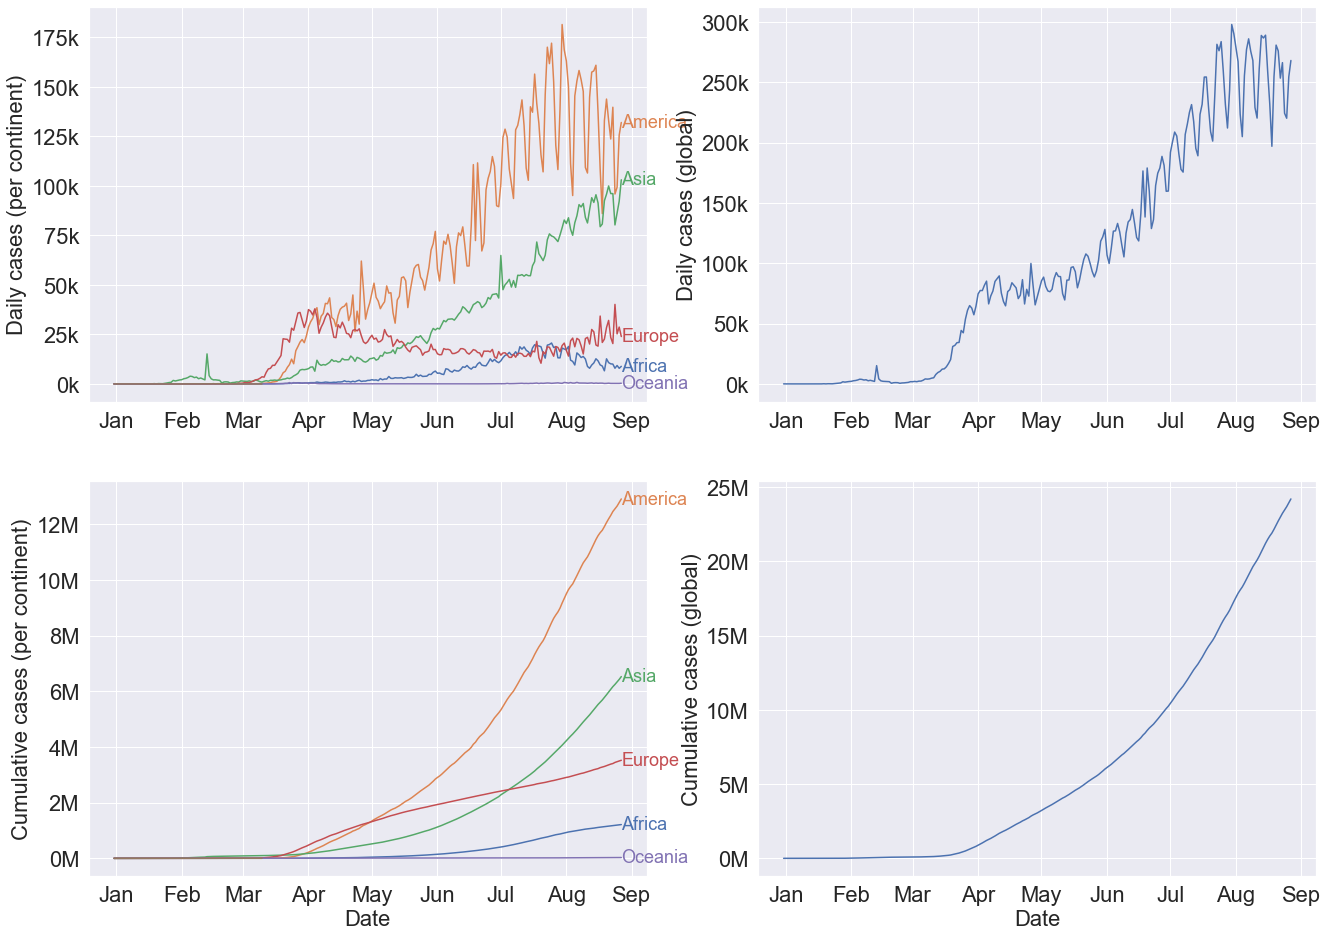

In [11]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Task_4_Fig_4.1_Patel_Abhishek.png')

#### Smooth Graphs

In [12]:
# a1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Asia']
# a2 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Africa']
# a3 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'America']
# e1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Europe']
# o1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Oceania']

# def plot(df1, df2, df3, df4, df5):
    
#     x1 = df1['DateRep']
#     y1 = df1['Cases']

#     x2 = df2['DateRep']
#     y2 = df2['Cases']
    
#     x3 = df3['DateRep']
#     y3 = df3['Cases']
    
#     x4 = df4['DateRep']
#     y4 = df4['Cases']
    
#     x5 = df5['DateRep']
#     y5 = df5['Cases']

#     def smooth(y, box_pts):
#         box = np.ones(box_pts)/box_pts
#         y_smooth = np.convolve(y, box, mode='same')
#         return y_smooth

#     sns.lineplot(x1, smooth(y1,7))    
#     sns.lineplot(x2, smooth(y2,7))    
#     sns.lineplot(x3, smooth(y3,7))    
#     sns.lineplot(x4, smooth(y4,7))    
#     sns.lineplot(x5, smooth(y5,7))
# #     sns.move_legend

In [13]:
# plot(a1, a2, a3, e1, o1)

In [14]:
a1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Africa']
a2 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'America']
a3 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Asia']
e1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Europe']
o1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Oceania']

x1 = a1['DateRep']
y1 = a1['Cases']

x2 = a2['DateRep']
y2 = a2['Cases']
    
x3 = a3['DateRep']
y3 = a3['Cases']
  
x4 = e1['DateRep']
y4 = e1['Cases']
   
x5 = o1['DateRep']
y5 = o1['Cases']

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

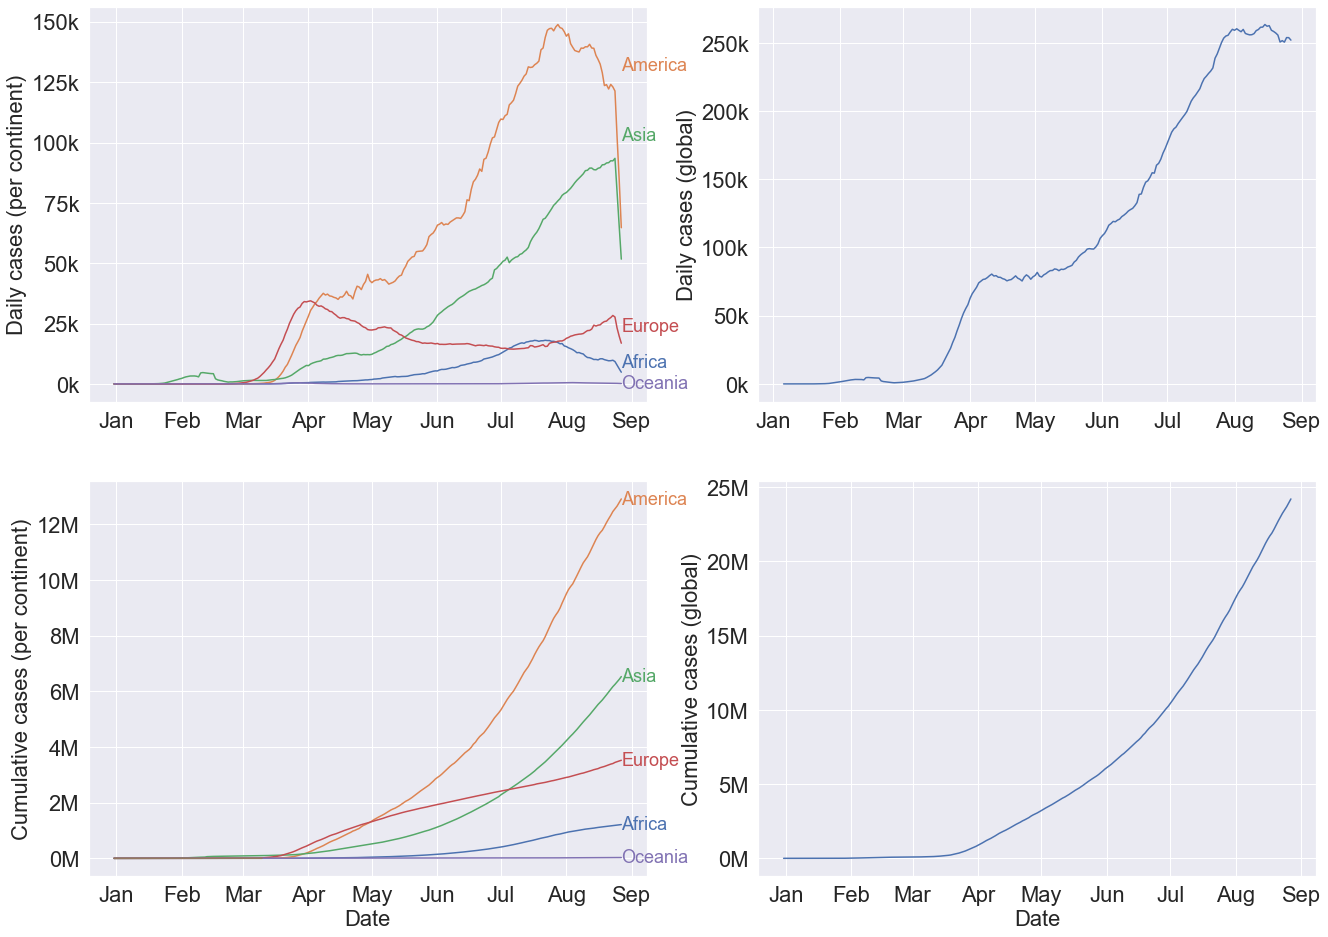

In [15]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x1, smooth(y1,7), ax = axes[0, 0])    
ax1 = sns.lineplot(x2, smooth(y2,7), ax = axes[0, 0])    
ax1 = sns.lineplot(x3, smooth(y3,7), ax = axes[0, 0])    
ax1 = sns.lineplot(x4, smooth(y4,7), ax = axes[0, 0])    
ax1 = sns.lineplot(x5, smooth(y5,7), ax = axes[0, 0])
# ax1 = sns.lineplot(x="DateRep", y=covid_daily_per_continent.Cases.rolling(1).mean(), hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y=covid_daily_global.Cases.rolling(7).mean(), data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Task_4_Fig_4.2_Patel_Abhishek.png')

### Daily Mortality rates and Cumlative Daily Mortality rates

#### Noisy Data

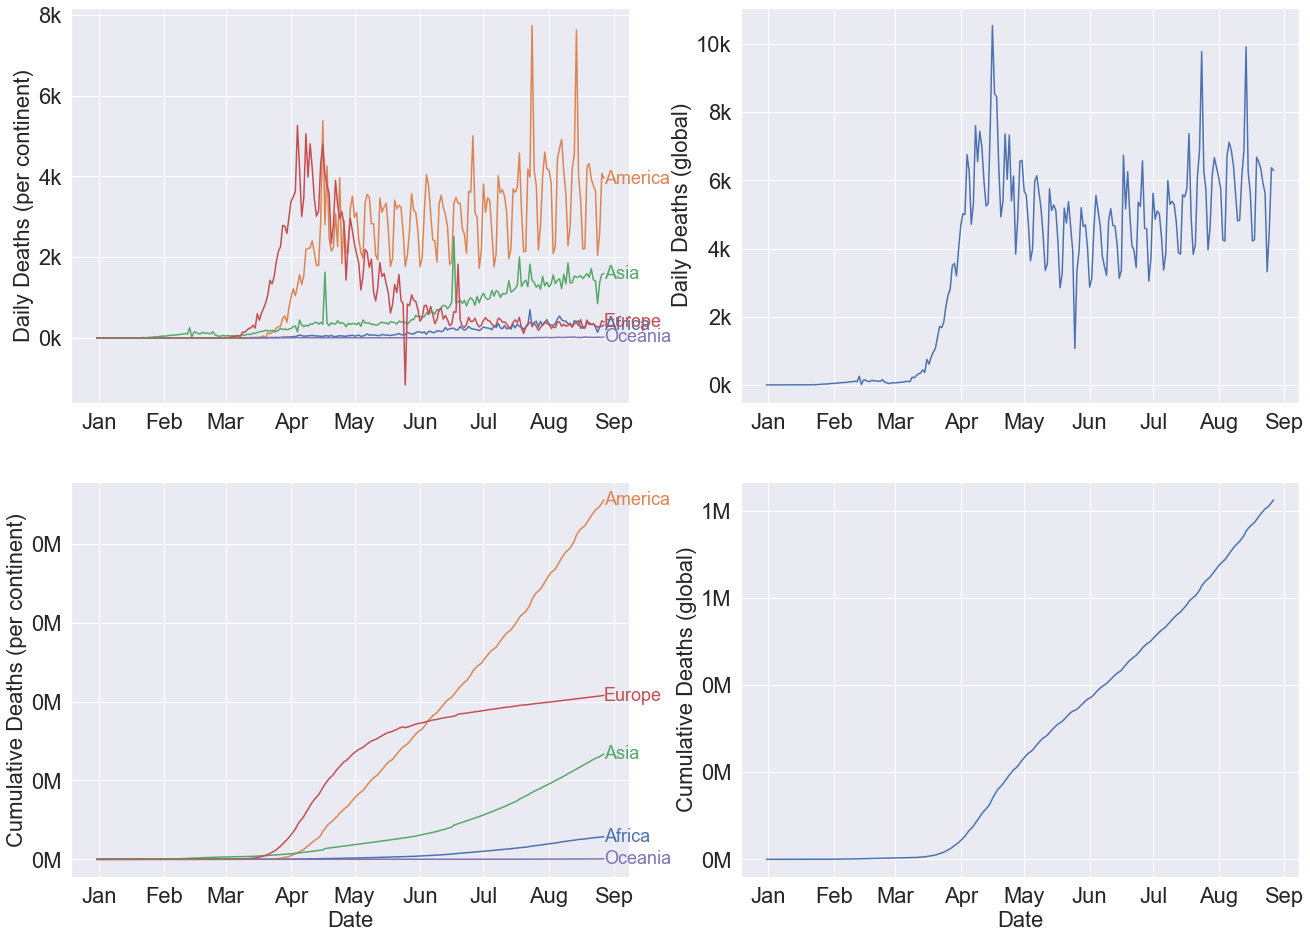

In [16]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily Deaths (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative Deaths (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily Deaths (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative Deaths (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Task_4_Fig_4.3_Patel_Abhishek.png')

#### Smooth Data

In [17]:
# a1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Asia']
# a2 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Africa']
# a3 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'America']
# e1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Europe']
# o1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Oceania']

# def plot(df1, df2, df3, df4, df5):
    
#     x1 = df1['DateRep']
#     y1 = df1['Deaths']

#     x2 = df2['DateRep']
#     y2 = df2['Deaths']
    
#     x3 = df3['DateRep']
#     y3 = df3['Deaths']
    
#     x4 = df4['DateRep']
#     y4 = df4['Deaths']
    
#     x5 = df5['DateRep']
#     y5 = df5['Deaths']

#     def smooth(y, box_pts):
#         box = np.ones(box_pts)/box_pts
#         y_smooth = np.convolve(y, box, mode='same')
#         return y_smooth

#     sns.lineplot(x1, smooth(y1,7))    
#     sns.lineplot(x2, smooth(y2,7))    
#     sns.lineplot(x3, smooth(y3,7))    
#     sns.lineplot(x4, smooth(y4,7))    
#     sns.lineplot(x5, smooth(y5,7))
# #     sns.move_legend

In [18]:
# plot(a1, a2, a3, e1, o1)

In [19]:
a1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Africa']
a2 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'America']
a3 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Asia']
e1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Europe']
o1 = covid_daily_per_continent[covid_daily_per_continent.Continent == 'Oceania']

x1 = a1['DateRep']
y1 = a1['Deaths']

x2 = a2['DateRep']
y2 = a2['Deaths']
    
x3 = a3['DateRep']
y3 = a3['Deaths']
  
x4 = e1['DateRep']
y4 = e1['Deaths']
   
x5 = o1['DateRep']
y5 = o1['Deaths']

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

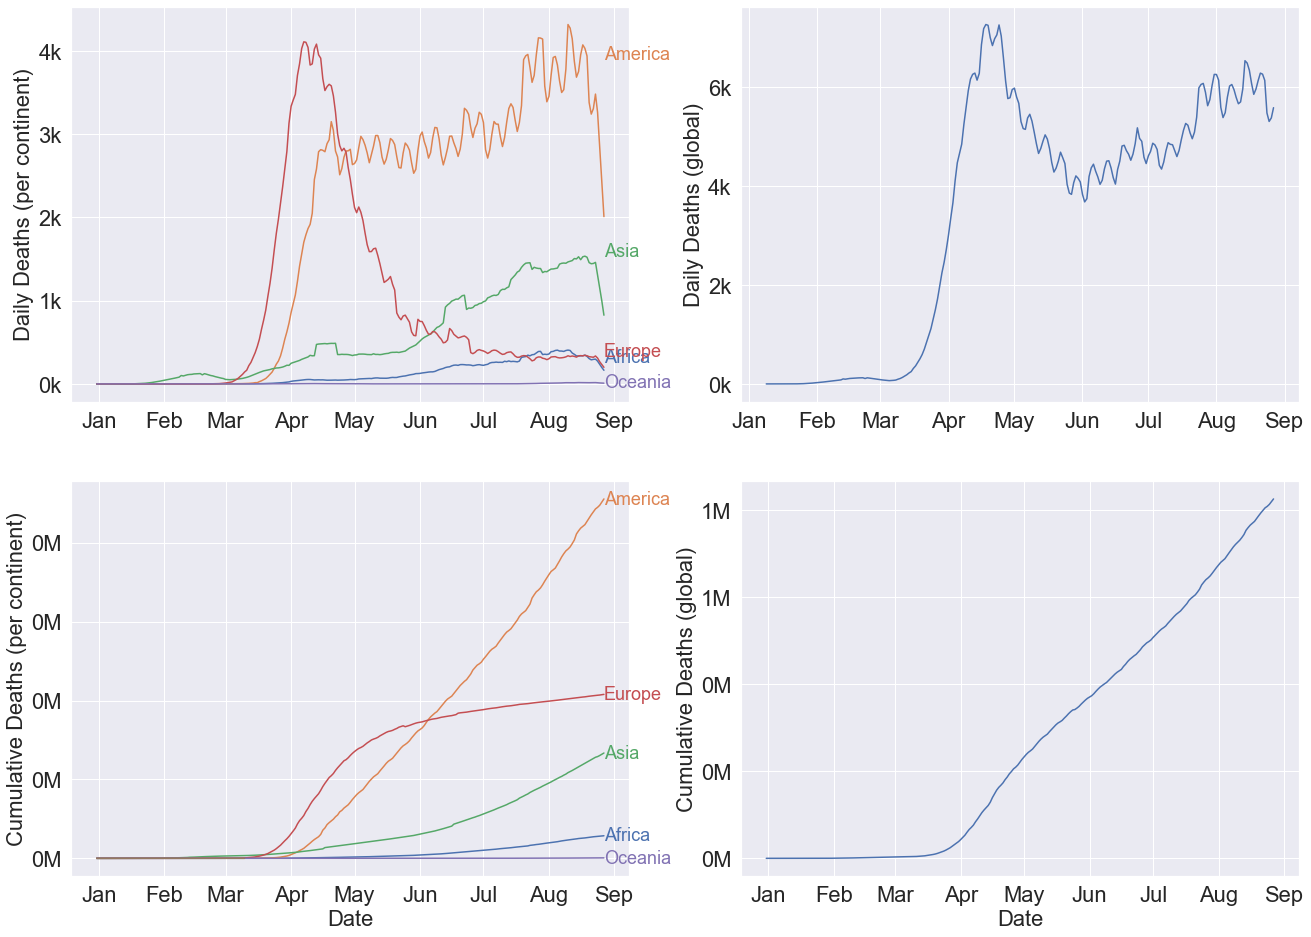

In [20]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x1, smooth(y1,10), ax = axes[0, 0])    
ax1 = sns.lineplot(x2, smooth(y2,10), ax = axes[0, 0])    
ax1 = sns.lineplot(x3, smooth(y3,10), ax = axes[0, 0])    
ax1 = sns.lineplot(x4, smooth(y4,10), ax = axes[0, 0])    
ax1 = sns.lineplot(x5, smooth(y5,10), ax = axes[0, 0])
# ax1 = sns.lineplot(x="DateRep", y=covid_daily_per_continent.Deaths.rolling(1).mean(), hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily Deaths (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative Deaths (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y=covid_daily_global.Deaths.rolling(10).mean(), data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily Deaths (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative Deaths (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Task_4_Fig_4.4_Patel_Abhishek.png')